### Student Name: Vipul Popat
### Student ID: 18195121

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./Task4.csv')

df.head(5)

,X,y
0,0.0000,-0.3080
1,0.0101,-0.3470
2,0.0202,-0.0937
3,0.0303,-0.2860
4,0.0404,-0.0927


In [3]:
X = df['X'].values
y = df['y'].values


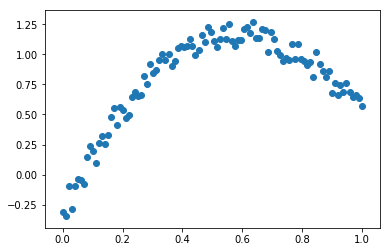

In [4]:
plt.scatter(X, y)

# Task 4  (CE6002)
#### *Copy your linear classification algorithm to the notebook Etivity3_LinearRegression.ipynb available in the git repository. Change your linear classification algorithm to make it suitable for linear regression. Use this to obtain the best possible classification of the data set Task4.csv. Your classification performance should improve if you add some new features.*
  

In [5]:
class LearningAlgorithm(object):
    """ 
    Parameters
    ------------
    rate : float
        Learning rate (ranging from 0.0 to 1.0)
    number_of_iteration : int
        Number of iterations over the input dataset.

    Attributes:
    ------------

    coef_ : 1d-array
        Weights after fitting.

    errors  : model error
        Number of misclassification in every epoch(one full training cycle on the training set)

    """

    def fit(self, X, y):
        X_inverse = np.linalg.pinv(X)
        w_lin = np.matmul(X_inverse, y)
        self.coef_ = w_lin

    def dot_product(self, X):
        """ Calculate the dot product """
        return (np.dot(X, np.transpose(self.coef_)))

    def predictClass(self, X):
        """ Predicting the label for the input data """
        return np.sign(self.dot_product(X)) 
    

    def predict(self, X):
        """ Predicting the label for the input data """
        return self.dot_product(X)
    
def calc_mean_square_error(orig, calc):
    e_sq = 0
    N = len(orig)
    for i in range(N):
        e_sq += math.pow((orig[i] - calc[i]),2)
    return math.sqrt(e_sq/N)

# thanks to michel danjou for this method
def calc_polynom(weights, X):
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 
    
def plot_data_and_algorithm(X, y, alg):
    test_train_ratio = 0.2
    X_shuffled, y_shuffled = shuffle(X, y, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=test_train_ratio, random_state=0)
    
    alg.fit(X_train, y_train)

    minx = np.amin(X_train)
    maxx = np.amax(X_train)
    s = len(X[:,1])
    x_line = np.linspace(minx, maxx, s)
    y_line = calc_polynom(alg.coef_, x_line)
    plt.plot(x_line, y_line)

    
    y_out = alg.predict(X_test)
    error_mse = calc_mean_square_error(y_out, y_test)
    print("Error = ",error_mse)
    plt.scatter(X[:,1], y, c=y)
    
    # printing the results away from the actual data so that we are able to identify the test/train data correctly
    plt.scatter(X_test[:,1], np.sign(y_out)*2, c=y_test)
    
def decision_boundary_lin(weights, x_min, x_max):
   # Return two points on the decision boundary
   return [point_on_boundary_lin(weights, x_min), point_on_boundary_lin(weights, x_max)]

def point_on_boundary_lin(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2] 


Error =  0.33999752513905723


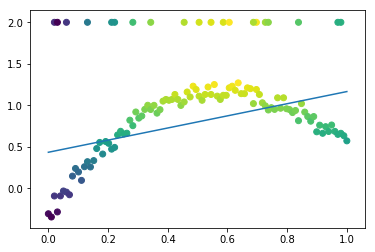

In [6]:
bias = np.ones(len(X))
X_with_bias =  np.vstack((bias,X))
Xt = X_with_bias.T

p = LearningAlgorithm()
plot_data_and_algorithm(Xt, y.T, p)

The error rate calculated is around 34%

TODO - Calculate the error rate for X_square